<a href="https://colab.research.google.com/github/Fatema2525/machine-learning-and-deep-learning-projects/blob/main/MNIST_Digit_Classification_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten Digit Classification with Deep Learning**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [ ]:
print(X_train[5].shape)

(28, 28)


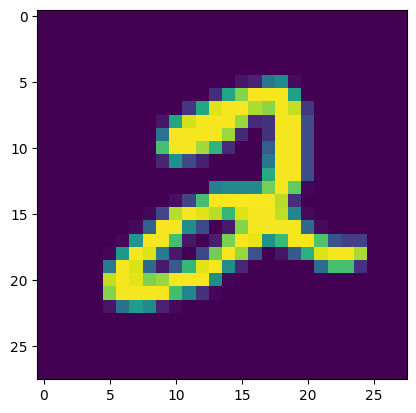

2


In [ ]:
plt.imshow(X_train[5])
plt.show()

print(Y_train[5])

In [ ]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[5])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building Neural Network

In [ ]:
model = keras.Sequential([
                 keras.layers.Flatten(input_shape=(28,28)),
                 keras.layers.Dense(50,activation='relu'),
                 keras.layers.Dense(50,activation='relu'),
                 keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
       optimizer = 'adam',
       loss = 'sparse_categorical_crossentropy',
       metrics = ['accuracy']
)

In [ ]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8486 - loss: 0.5230
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9549 - loss: 0.1530
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9677 - loss: 0.1072
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9757 - loss: 0.0814
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9804 - loss: 0.0662
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9836 - loss: 0.0553
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0455
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0391
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9899 - loss: 0.0336
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0283


Training data accuracy 99.08%

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9602 - loss: 0.1804
0.9635999798774719


Test Data Accuracy 96.36%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


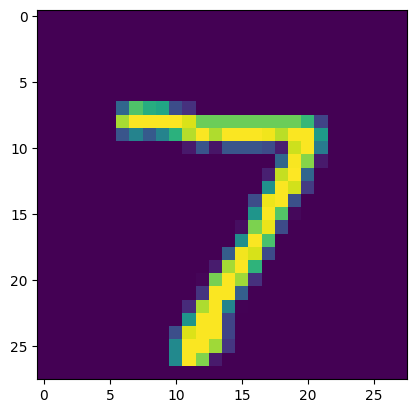

7


In [ ]:
plt.imshow(X_test[0])
plt.show()
print(Y_test[0])

In [ ]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
Y_pred.shape

(10000, 10)

In [ ]:
print(Y_pred[0])

[3.7931408e-05 2.2485130e-03 7.8067081e-03 9.8642635e-01 9.4153663e-09
 2.6171939e-02 7.2115459e-11 9.9999171e-01 3.2942972e-01 9.3086028e-01]


In [ ]:
label = np.argmax(Y_pred[0])
print(label)

7


In [ ]:
labels = [np.argmax(i) for i in Y_pred]
print(labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(8), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [ ]:
con_mat = confusion_matrix(Y_test,labels)
print(con_mat)

tf.Tensor(
[[ 947    0    3    2    3    0   14    0    5    6]
 [   0 1112    5    1    1    1    4    1   10    0]
 [   3    1 1003    6    2    0    4    2    9    2]
 [   0    0    2  985    2    1    0    1   12    7]
 [   1    1    1    0  964    2    7    1    4    1]
 [   4    0    1   42    4  808   14    0   17    2]
 [   2    2    2    1    4    2  942    0    3    0]
 [   2    2   13   11    7    0    0  973    6   14]
 [   1    0    3    7    3    1    4    2  952    1]
 [   2    2    0    9   22    4    0    2   18  950]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted label')

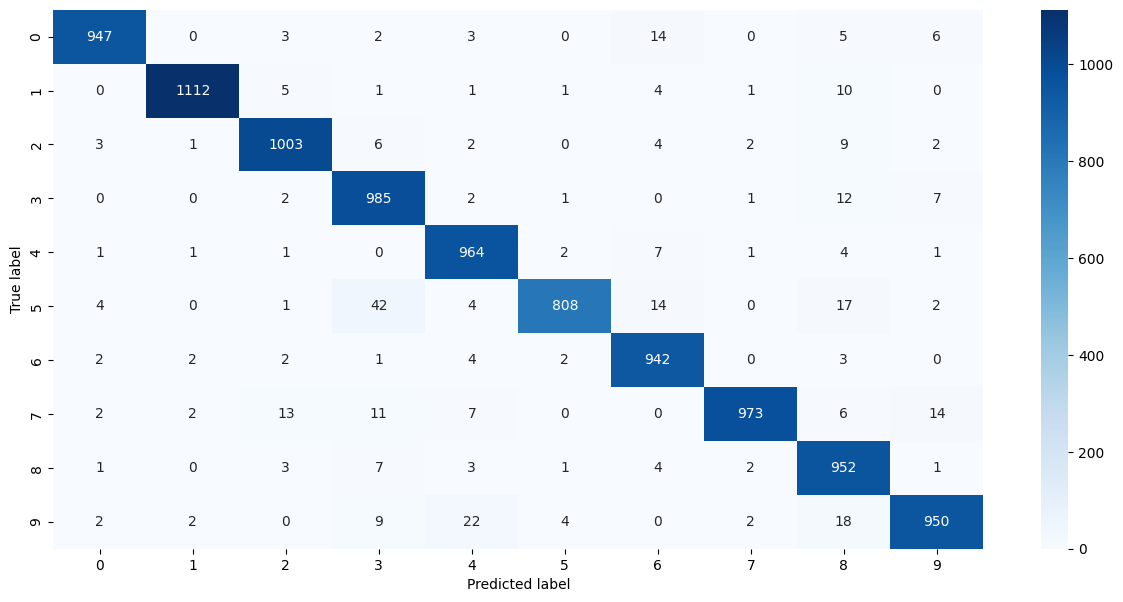

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(con_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Predicting System

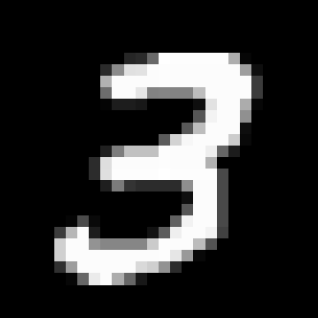

In [31]:
input_image = cv2.imread('/content/MNIST_digit.png')
cv2_imshow(input_image)


In [34]:
input_image.shape

(318, 318, 3)

In [32]:
gray = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [35]:
gray.shape

(318, 318)

In [36]:
reshaped_image = cv2.resize(gray,(28,28))

In [38]:
reshaped_image.shape

(28, 28)

In [39]:
cv2_imshow(reshaped_image)

In [40]:
reshaped_image = reshaped_image/255

In [41]:
image = np.reshape(reshaped_image,[1,28,28])

In [42]:
prediction = model.predict(image)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[1.5237894e-14 3.3045143e-07 4.2765104e-04 1.0000000e+00 3.4672409e-14
  2.5786376e-03 1.3159030e-14 6.2586037e-06 9.9948895e-01 1.6129021e-01]]


In [43]:
label = np.argmax(prediction)
print(label)

3
